# COMPETENCIA DE KAGGLE DIPLODATOS 2022



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import xgboost as xgb
import sklearn.linear_model
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv")

- **Atributos y variable objetivo**

- PassengerId - Un identificador para cada pasajero.

- HomePlanet - El planeta del cual partió el pasajero. Típicamente su planeta de residencia permanente.

- CryoSleep - Indica si el pasajero fue electo a ser puesto en suspensión animada durante la duración del viaje. Los pasajeros en CryoSleep están confinados a sus cabinas.

- Cabin - El número de cabina en donde el pasajero se está quedando. Toma la forma piso/número/lado, donde el lado puede ser P por Port o S por Starboard.

- Destination - El destino en donde va a desembarcar el pasajero.

- Age - La edad del pasajero.

- VIP - Si el pasajero pagó por servicios VIP durante el viaje.

- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Cantidad que el pasajero ha gastado en cada una de las comodidades de lujo del Spaceship Titanic.

- Name - El nombre y apellido de cada pasajero.

- Transported - Si el pasajero fue transportado a otra dimensión o no. Esta es la columna target, la columna a predecir.

In [ ]:
#Visualizamos el encabezado de nuestro dataset

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0


In [ ]:
#Verificamos si el dataset se encuentra balanceado 
df.Transported.value_counts()

1    3964
0    3859
Name: Transported, dtype: int64

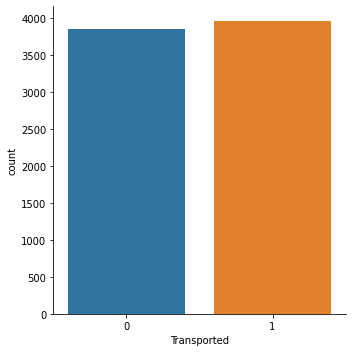

In [ ]:
#Graficamos para demostrar que no existe desbalanceo.
sb.factorplot('Transported', data=df, kind="count")

In [ ]:
#Visualizamos los valores estadísticos de nuestras variables numéricas

df.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [ ]:
#Verificamos con qué tipo de datos estamos trabajando

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


### Curación


In [ ]:
#Verificamos valores igual a "0" para la columna "Age"

count = (df['Age'] == 0.0).sum()

print('Count of zeros in "Age" : ', count)

Count of zeros in "Age" :  160


In [ ]:
#Convertimos esos valores atípicos por valores NaN para poder imputar por KNN más adelante

df['Age']= df['Age'].replace(0, np.nan)
#df['Age']= df['Age'].replace(df.Age.mean(), np.nan)
#df['Age']= df['Age'].replace(df.Age.median(), np.nan)

In [ ]:
# Creamos nueva columna con la suma de los gastos
#df['LuxurySpend'] = df['RoomService'] + df['Spa'] + df['VRDeck'] + df['ShoppingMall'] + df['FoodCourt'] 
#df['LuxurySpend'] = df['Spa'] + df['VRDeck'] + df['ShoppingMall']


In [ ]:
df['Adult']='Adult'
df.loc[df['Age']<15, 'Adult']='KID'

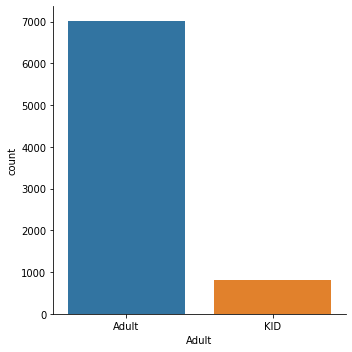

In [ ]:
sb.factorplot('Adult', data=df, kind="count")

In [ ]:
#Visualizamos columnas y filas del dataset

df.shape

(7823, 15)

In [ ]:
#Eliminamos la columna "PassengerId" ya que no predice la variable objetivo

df.drop('PassengerId',axis=1, inplace=True)

In [ ]:
df_num = df[numerical_cols]

In [ ]:
correlation = df_num_knn.corr()

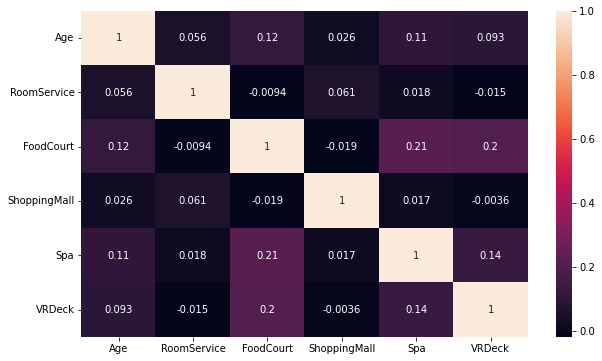

In [ ]:

plt.figure(figsize=(10, 6))

sb.heatmap(correlation, annot=True);

In [ ]:
df.isna().sum()

HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             322
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
Adult             0
dtype: int64

In [ ]:
#Chequeamos valores nulos para las distintas categorías
# df['RoomService']=df['RoomService'].fillna(0)
# df['FoodCourt']=df['FoodCourt'].fillna(0)
# df['ShoppingMall']=df['ShoppingMall'].fillna(0)
# df['Spa']=df['Spa'].fillna(0)
# df['VRDeck']=df['VRDeck'].fillna(0)
df.isna().sum()

HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             322
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
Adult             0
dtype: int64

In [ ]:
#Recopilamos mayor cantidad de datos a partir de la información del atributo "Cabin"

name = df['Cabin'].str.split('/', expand=True)
name.columns = ['CabinFloor', 'CabinNumber', 'CabinSide']
df = pd.concat([df, name], axis=1)
y = df.Transported

df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Adult,FirstName,LastName,CabinFloor,CabinNumber,CabinSide
0,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0,Adult,Azhah,Tronsive,C,123,P
1,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1,Adult,Roswal,Sha,F,126,S
2,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1,Adult,Shaiam,Tinganking,B,343,S
3,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0,Adult,Landa,Grifford,F,1420,P
4,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0,Adult,Gracy,Dunnisey,G,9,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1,KID,Risps,Hacle,F,1319,S
7819,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0,Adult,Gabrie,Reenez,G,459,S
7820,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1,Adult,Panzel,Ruity,F,1772,P
7821,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0,Adult,Belly,Weavesend,E,253,P


In [ ]:
#Eliminamos la columna "Cabin" ya que ahora contamos con una información más precisa de la misma

df.drop('Cabin',axis=1,inplace=True)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Adult,FirstName,LastName,CabinFloor,CabinNumber,CabinSide,FirstName,LastName
0,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0,Adult,Azhah,Tronsive,C,123,P,Azhah,Tronsive
1,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1,Adult,Roswal,Sha,F,126,S,Roswal,Sha
2,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1,Adult,Shaiam,Tinganking,B,343,S,Shaiam,Tinganking
3,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0,Adult,Landa,Grifford,F,1420,P,Landa,Grifford
4,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0,Adult,Gracy,Dunnisey,G,9,P,Gracy,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Mars,False,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1,KID,Risps,Hacle,F,1319,S,Risps,Hacle
7819,Earth,False,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0,Adult,Gabrie,Reenez,G,459,S,Gabrie,Reenez
7820,Mars,True,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1,Adult,Panzel,Ruity,F,1772,P,Panzel,Ruity
7821,Earth,False,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0,Adult,Belly,Weavesend,E,253,P,Belly,Weavesend


In [ ]:
#Vemos cómo quedaron conformados nuestros tipos de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7644 non-null   object 
 1   CryoSleep     7627 non-null   object 
 2   Destination   7663 non-null   object 
 3   Age           7501 non-null   float64
 4   VIP           7639 non-null   object 
 5   RoomService   7669 non-null   float64
 6   FoodCourt     7668 non-null   float64
 7   ShoppingMall  7635 non-null   float64
 8   Spa           7665 non-null   float64
 9   VRDeck        7654 non-null   float64
 10  Name          7639 non-null   object 
 11  Transported   7823 non-null   int64  
 12  Adult         7823 non-null   object 
 13  FirstName     7639 non-null   object 
 14  LastName      7639 non-null   object 
 15  CabinFloor    7639 non-null   object 
 16  CabinNumber   7639 non-null   object 
 17  CabinSide     7639 non-null   object 
 18  FirstName     7639 non-null 

In [ ]:
#Chequeamos valores nulos para las distintas categorías

df.isna().sum()

HomePlanet      179
CryoSleep       196
Destination     160
Age             322
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
Adult             0
FirstName       184
LastName        184
CabinFloor      184
CabinNumber     184
CabinSide       184
FirstName       184
LastName        184
dtype: int64

- Primero vamos a realizar un One Hot Encoder para aquellas variables categóricas seleccionadas que veremos a continuación cuáles son.

In [ ]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'Adult', 'FirstName', 'LastName', 'CabinFloor', 'CabinNumber',
       'CabinSide', 'FirstName', 'LastName'],
      dtype='object')

In [ ]:
categorical_cols = ['HomePlanet','CryoSleep','Destination','VIP', 'CabinFloor', 'CabinSide','Adult']
#categorical_cols = ['HomePlanet','CryoSleep','Destination','VIP', 'CabinFloor', 'CabinSide']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
#Verificamos la cantidad de valores únicos por columna

df[categorical_cols].nunique()

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
CabinFloor     8
CabinSide      2
Adult          2
dtype: int64

In [ ]:
#Hacemos división del dataset entre variables categóricas y numéricas

df_cat = df[categorical_cols]
df_num = df[numerical_cols]

In [ ]:
#Vemos el encabezado del dataframe de variables categóricas

df_cat.head()

,HomePlanet,CryoSleep,Destination,VIP,CabinFloor,CabinSide,Adult
0,Europa,False,TRAPPIST-1e,False,C,P,Adult
1,Mars,True,NaN,False,F,S,Adult
2,Europa,True,TRAPPIST-1e,NaN,B,S,Adult
3,Earth,False,TRAPPIST-1e,False,F,P,Adult
4,Earth,False,TRAPPIST-1e,False,G,P,Adult


In [ ]:
# Sustituimos valores nulos por el valor "Unknown" 

df_cat = df_cat.fillna("Unknown")
df_cat

,HomePlanet,CryoSleep,Destination,VIP,CabinFloor,CabinSide,Adult
0,Europa,False,TRAPPIST-1e,False,C,P,Adult
1,Mars,True,Unknown,False,F,S,Adult
2,Europa,True,TRAPPIST-1e,Unknown,B,S,Adult
3,Earth,False,TRAPPIST-1e,False,F,P,Adult
4,Earth,False,TRAPPIST-1e,False,G,P,Adult
...,...,...,...,...,...,...,...
7818,Mars,False,TRAPPIST-1e,Unknown,F,S,KID
7819,Earth,False,TRAPPIST-1e,False,G,S,Adult
7820,Mars,True,TRAPPIST-1e,False,F,P,Adult
7821,Earth,False,TRAPPIST-1e,False,E,P,Adult


In [ ]:

pd.crosstab(df.Transported, df.HomePlanet, normalize=True).round(2)


HomePlanet,Earth,Europa,Mars
Transported,,,
0,0.31,0.09,0.10
1,0.23,0.17,0.11


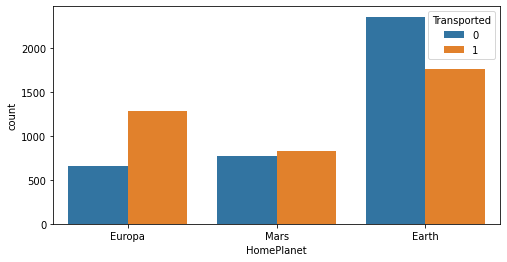

In [ ]:
fig = plt.figure(figsize=(8,4))
sb.countplot(df.HomePlanet,  hue=df.Transported)

In [ ]:
pd.crosstab(df.Transported, df.CabinSide, normalize=True).round(2)

CabinSide,P,S
Transported,,
0,0.27,0.22
1,0.23,0.28


<function matplotlib.pyplot.show(*args, **kw)>

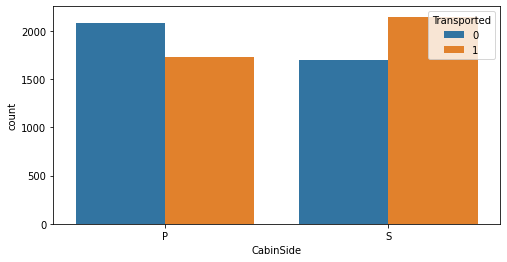

In [ ]:
fig = plt.figure(figsize=(8,4))
sb.countplot(df.CabinSide,  hue=df.Transported)
plt.show

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   7823 non-null   object
 1   CryoSleep    7823 non-null   object
 2   Destination  7823 non-null   object
 3   VIP          7823 non-null   object
 4   CabinFloor   7823 non-null   object
 5   CabinSide    7823 non-null   object
 6   Adult        7823 non-null   object
dtypes: object(7)
memory usage: 427.9+ KB


In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 27.3 MB/s 
     |████████████████████████████████| 9.8 MB 49.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables=['HomePlanet','CryoSleep','Destination', 'VIP', 'CabinFloor', 'CabinSide','Adult']).fit(df_cat)
#encoder = OneHotEncoder(variables=['HomePlanet','CryoSleep','Destination', 'VIP', 'CabinFloor', 'CabinSide']).fit(df_cat)

df_one_hot = encoder.transform(df_cat)

df_one_hot

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Earth,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_TRAPPIST-1e,Destination_Unknown,Destination_PSO J318.5-22,...,CabinFloor_E,CabinFloor_D,CabinFloor_Unknown,CabinFloor_A,CabinFloor_T,CabinSide_P,CabinSide_S,CabinSide_Unknown,Adult_Adult,Adult_KID
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
7819,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7820,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7821,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df_one_hot.isna().sum()

HomePlanet_Europa            0
HomePlanet_Mars              0
HomePlanet_Earth             0
HomePlanet_Unknown           0
CryoSleep_False              0
CryoSleep_True               0
CryoSleep_Unknown            0
Destination_TRAPPIST-1e      0
Destination_Unknown          0
Destination_PSO J318.5-22    0
Destination_55 Cancri e      0
VIP_False                    0
VIP_Unknown                  0
VIP_True                     0
CabinFloor_C                 0
CabinFloor_F                 0
CabinFloor_B                 0
CabinFloor_G                 0
CabinFloor_E                 0
CabinFloor_D                 0
CabinFloor_Unknown           0
CabinFloor_A                 0
CabinFloor_T                 0
CabinSide_P                  0
CabinSide_S                  0
CabinSide_Unknown            0
Adult_Adult                  0
Adult_KID                    0
dtype: int64

In [ ]:
#Imputamos las variables numéricas con KNN

df_num_knn = df_num.copy(deep=True)

relevant_cols = numerical_cols 

knn_imputer = KNNImputer(n_neighbors=2, weights='uniform').fit(df_num_knn[relevant_cols])

df_num_knn[relevant_cols] = knn_imputer.transform(df_num_knn[relevant_cols])

# msno.bar(df_num_knn, figsize=(12, 6), fontsize=12, color='steelblue');

Se observa que la mayor correlación existe entre las variables `FoodCourt` y `Spa`.

In [ ]:
df_num_knn.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
#Unimos nuevamente los datasets explorados y curados

df_join = pd.concat([df_one_hot, df_num_knn], axis=1, join='inner')

df_join

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Earth,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_TRAPPIST-1e,Destination_Unknown,Destination_PSO J318.5-22,...,CabinSide_S,CabinSide_Unknown,Adult_Adult,Adult_KID,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,57.0,0.0,3859.0,13.0,195.0,3874.0
1,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,18.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,1,0,1,0,0,...,1,0,1,0,33.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,43.0,142.0,1208.0,0.0,0.0,204.0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,19.0,0.0,0.0,670.0,1.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,12.0,0.0,0.0,0.0,0.0,0.0
7819,0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,44.0,0.0,0.0,744.0,62.0,3.0
7820,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,55.0,0.0,0.0,0.0,0.0,0.0
7821,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,15.0,0.0,840.0,123.0,0.0,20.0


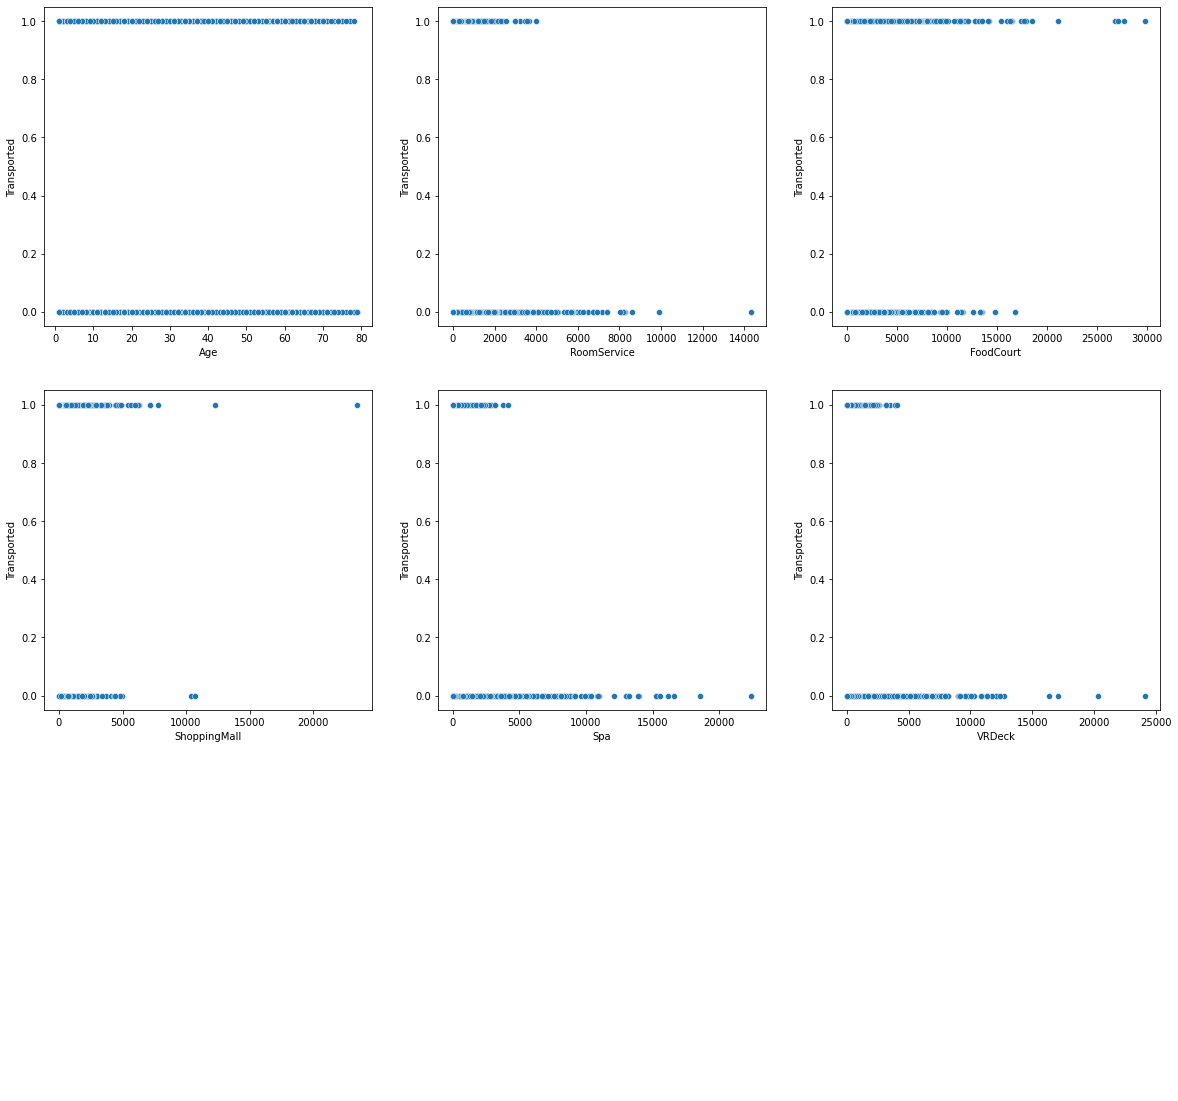

In [ ]:
#Observamos si existen atributos correlacionados a simple vista con la variable objetivo

features = df_num.columns

# # Creamos diseño general
n_cols = 3
n_rows = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, feature in enumerate(features):
#     # Calculamos filas y columnas
     row = math.floor(i / n_cols)
     col = i % n_cols
     # Configuramos visualización
     ax = axs[row, col]
     # Visualizamos la distribución de variables
     sb.scatterplot(data=df, x=feature, y='Transported', ax=ax)

# # Limpiamos gráficos vacíos
for col in range(n_cols):
      for row in range(n_rows):
        if not axs[row, col].has_data():
          axs[row, col].axis('off')

Como podemos observar no existe a simple vista una correlación clara entre los atributos y la variable objetivo a predecir.

In [ ]:
df_join

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Earth,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_TRAPPIST-1e,Destination_Unknown,Destination_PSO J318.5-22,...,CabinSide_S,CabinSide_Unknown,Adult_Adult,Adult_KID,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,57.0,0.0,3859.0,13.0,195.0,3874.0
1,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,18.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,1,0,1,0,0,...,1,0,1,0,33.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,43.0,142.0,1208.0,0.0,0.0,204.0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,19.0,0.0,0.0,670.0,1.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,12.0,0.0,0.0,0.0,0.0,0.0
7819,0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,44.0,0.0,0.0,744.0,62.0,3.0
7820,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,55.0,0.0,0.0,0.0,0.0,0.0
7821,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,15.0,0.0,840.0,123.0,0.0,20.0


In [ ]:
X= df_join

In [ ]:
#X['spend_age'] = (X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['Spa'] + X['VRDeck']) / (X['Age'])
X['food_vs_luxury'] = (X['ShoppingMall'] + X['Spa'] + X['VRDeck']) / X['FoodCourt']

In [ ]:
X['food_vs_luxury']= X['food_vs_luxury'].replace(np.nan, 0)
X['food_vs_luxury']= X['food_vs_luxury'].replace(np.inf, 100000000000000000000)


In [ ]:
#Estandarizamos los datos

scaler = MinMaxScaler().fit(X)

scaled_matrix = scaler.transform(X)

X = pd.DataFrame(data=scaled_matrix, columns=X.columns)

In [ ]:
X

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Earth,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_TRAPPIST-1e,Destination_Unknown,Destination_PSO J318.5-22,...,CabinSide_Unknown,Adult_Adult,Adult_KID,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,food_vs_luxury
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.717949,0.000000,0.129440,0.000553,0.008702,0.160527,1.057787e-20
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.217949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.410256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.538462,0.009911,0.040519,0.000000,0.000000,0.008453,1.688742e-21
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.230769,0.000000,0.000000,0.028520,0.000045,0.001409,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.141026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
7819,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.551282,0.000000,0.000000,0.031670,0.002767,0.000124,1.000000e+00
7820,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
7821,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.179487,0.000000,0.028176,0.005236,0.000000,0.000829,1.702381e-21


In [ ]:
# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, shuffle= True)

## Modelos

### **KNN**

In [ ]:
# #creating sets for errors
# error1= []
# error2= []

# # for loop 
# for k in range(1,20):
#     # using KNN algorithm
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train,y_train)
#     y_pred1 = knn.predict(X_train)

#     # stroring the errors
#     error1.append(np.mean(y_train!= y_pred1))
#     y_pred2 = knn.predict(X_test)
#     error2.append(np.mean(y_test != y_pred2))

# # ploting the graphs for testing and training 
# plt.plot(range(1,20), error1, label="train")
# plt.plot(range(1,20), error2, label="test")
# plt.xlabel('k Value')
# plt.ylabel('Error')
# plt.legend()

In [ ]:
# # K value set to be 22
# classifier = KNeighborsClassifier(n_neighbors=22)

# # model training
# classifier.fit(X_train,y_train)

# # testing the model
# y_pred= classifier.predict(X_test)

In [ ]:
# # importing accuracy_score
# from sklearn.metrics import accuracy_score

# # printing accuracy
# print(accuracy_score(y_test,y_pred))

### **XGBOOST**

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("classifier",xgb.XGBClassifier(objective='binary:logistic', early_stopping_rounds=2,reg_lambda=0,seed = 0) )])

In [ ]:
search_space = [
    {
        "classifier": [xgb.XGBClassifier(metric="accuracy")],
        "classifier__n_estimators": list(range(80, 210, 10)),
        "classifier__max_depth": list(range(2, 5, 1)),
        "classifier__nthread": list(range(0, 1, 1)),
        "classifier__learning_rate": [0.1,0.15,0.2,0.3]
    }
]

In [ ]:
 xg_cl = GridSearchCV(pipe, search_space, cv=10, verbose=30)

In [ ]:
mejor_modelo = xg_cl.fit(X_train, y_train)
print(mejor_modelo.best_estimator_.get_params()["classifier"])

Fitting 10 folds for each of 156 candidates, totalling 1560 fits
[CV 1/10; 1/156] START classifier=XGBClassifier(metric='accuracy'), classifier__learning_rate=0.1, classifier__max_depth=2, classifier__n_estimators=80, classifier__nthread=0
[CV 1/10; 1/156] END classifier=XGBClassifier(metric='accuracy'), classifier__learning_rate=0.1, classifier__max_depth=2, classifier__n_estimators=80, classifier__nthread=0;, score=0.807 total time=   0.4s
[CV 2/10; 1/156] START classifier=XGBClassifier(metric='accuracy'), classifier__learning_rate=0.1, classifier__max_depth=2, classifier__n_estimators=80, classifier__nthread=0
[CV 2/10; 1/156] END classifier=XGBClassifier(metric='accuracy'), classifier__learning_rate=0.1, classifier__max_depth=2, classifier__n_estimators=80, classifier__nthread=0;, score=0.754 total time=   0.3s
[CV 3/10; 1/156] START classifier=XGBClassifier(metric='accuracy'), classifier__learning_rate=0.1, classifier__max_depth=2, classifier__n_estimators=80, classifier__nthread=

In [ ]:
#Predict the model
preds = xg_cl.predict(X_test)

#Accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" %(accuracy))

accuracy: 0.809585


In [ ]:
GridSearchCV.best_estimator_

AttributeError: ignored

In [ ]:
#Instantiate
#xg_cl = xgb.XGBClassifier(objective='binary:logistic', colsample_bynode=1, colsample_bytree=1,
#                           colsample_bylevel=1, subsample=1, nthread=0, base_score=0.5,
#                           booster="gbtree", gamma=0, min_child_weight=1, max_depth=3,
#                           n_estimators = 200, learning_rate=0.15, reg_alpha=0, reg_lambda=0,  seed = 0)

In [ ]:
#Fit the model
#xg_cl.fit(X_train,y_train)

# #Predict the model
# preds = xg_cl.predict(X_test)

# #Accuracy
# accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
# print("accuracy: %f" %(accuracy))

### **SVM**




In [ ]:
# from sklearn.svm import SVC
# svc_fit = SVC()
# svc_fit.fit(X_train,y_train)

In [ ]:
# preds = svc_fit.predict(X_test)

# #Accuracy
# accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
# print("accuracy: %f" %(accuracy))

### **ENSEMBLE**

In [ ]:
# clf = ensemble.RandomForestClassifier(n_estimators=200, random_state=0)

# clf.fit(X_train, y_train);

In [ ]:
# preds = clf.predict(X_test)

# #Accuracy
# accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
# print("accuracy: %f" %(accuracy))

### **LGBMClassifier**

In [ ]:
# clf = lgb.LGBMClassifier(
# objective = 'regression',
# learning_rate = 0.02,
# num_iterations = 560,
# max_depth = -1,
# num_leaves = 10,
# boosting_type = 'gbdt',
# min_data_in_leaf = 28,
# random_state = 2022,
# n_estimators = 100,
# feature_fraction = 0.88,
# bagging_fraction = 0.97,
# bagging_freq = 33,
# reg_alpha = 0,
# reg_lambda = 0,
# )

In [ ]:
# clf.fit(X_train, y_train);

# preds = clf.predict(X_test)

# #Accuracy
# accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
# print("accuracy: %f" %(accuracy))

### **RANDOM FOREST**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rfClassifier = RandomForestClassifier()

# rfClassifier.fit(X_train, y_train)
# preds = rfClassifier.predict(X_test)

# #Accuracy
# accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
# print("accuracy: %f" %(accuracy))

## TEST KAGGLE

In [ ]:
test_df = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv")

PassengerId = test_df['PassengerId']

In [ ]:
#Visualizamos el encabezado de nuestro dataset

test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive


In [ ]:
#Verificamos valores igual a "0" para la columna "Age"

count = (test_df['Age'] == 0.0).sum()

print('Count of zeros in "Age" : ', count)

Count of zeros in "Age" :  18


In [ ]:
#Convertimos esos valores atípicos por valores NaN para poder imputar por KNN más adelante

test_df['Age']= df['Age'].replace(0, np.nan)

In [ ]:
#Creamos grupos por edad

test_df['Adult']='Adult'
test_df.loc[df['Age']<15, 'Adult']='KID'

In [ ]:
#Eliminamos la columna "PassengerId" ya que no predice la variable objetivo

test_df.drop('PassengerId',axis=1, inplace= True)

In [ ]:
#Chequeamos valores nulos para las distintas categorías

test_df.isna().sum()

HomePlanet      22
CryoSleep       21
Cabin           15
Destination     22
Age             39
VIP             19
RoomService     27
FoodCourt       28
ShoppingMall    20
Spa             25
VRDeck          19
Name            16
Adult            0
dtype: int64

Existe un 2.61% de datos faltantes dentro de los cuales existe un porcentaje pequeño de datos convertidos a dato faltante previamente en la columna "Age", concentrados en todas las variables menos la variable objetivo. Usando el paquete missingno podemos hacer un análisis gráfico de los datos faltantes.

In [ ]:
#Recopilamos mayor cantidad de datos a partir de la información del atributo "Cabin"

test_df['Cabin'].str.split('/', expand=True)
name = test_df['Cabin'].str.split('/', expand=True)
name.columns = ['CabinFloor', 'CabinNumber', 'CabinSide']
test_df = pd.concat([test_df, name], axis=1)
test_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Adult,CabinFloor,CabinNumber,CabinSide
0,Europa,True,NaN,55 Cancri e,57.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty,Adult,NaN,NaN,NaN
1,Earth,True,G/1489/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock,Adult,G,1489,S
2,Earth,False,G/776/P,TRAPPIST-1e,33.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley,Adult,G,776,P
3,Earth,False,E/577/S,PSO J318.5-22,43.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods,Adult,E,577,S
4,Europa,False,B/117/S,55 Cancri e,19.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive,Adult,B,117,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,Mars,False,F/1212/S,TRAPPIST-1e,28.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta,Adult,F,1212,S
866,Earth,True,G/947/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey,Adult,G,947,S
867,Earth,True,G/1148/P,PSO J318.5-22,31.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson,Adult,G,1148,P
868,Earth,False,F/293/S,TRAPPIST-1e,73.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley,Adult,F,293,S


In [ ]:
#Eliminamos la columna "Cabin" ya que ahora contamos con una información más precisa de la misma

test_df.drop('Cabin',axis=1,inplace=True)
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Adult,CabinFloor,CabinNumber,CabinSide
0,Europa,True,55 Cancri e,57.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty,Adult,NaN,NaN,NaN
1,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock,Adult,G,1489,S
2,Earth,False,TRAPPIST-1e,33.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley,Adult,G,776,P
3,Earth,False,PSO J318.5-22,43.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods,Adult,E,577,S
4,Europa,False,55 Cancri e,19.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive,Adult,B,117,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,Mars,False,TRAPPIST-1e,28.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta,Adult,F,1212,S
866,Earth,True,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey,Adult,G,947,S
867,Earth,True,PSO J318.5-22,31.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson,Adult,G,1148,P
868,Earth,False,TRAPPIST-1e,73.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley,Adult,F,293,S


- Primero vamos a realizar un One Hot Encoder para aquellas variables categóricas seleccionadas que veremos a continuación cuáles son.

In [ ]:
test_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Adult',
       'CabinFloor', 'CabinNumber', 'CabinSide'],
      dtype='object')

In [ ]:
#Verificamos la cantidad de valores únicos por columna

test_df[categorical_cols].nunique()

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
CabinFloor     8
CabinSide      2
Adult          2
dtype: int64

In [ ]:
#Hacemos división del dataset entre variables categóricas y numéricas

test_df_cat = test_df[categorical_cols]
test_df_num = test_df[numerical_cols]

In [ ]:
#Vemos el encabezado del dataframe de variables categóricas

test_df_cat.head()

,HomePlanet,CryoSleep,Destination,VIP,CabinFloor,CabinSide,Adult
0,Europa,True,55 Cancri e,False,NaN,NaN,Adult
1,Earth,True,PSO J318.5-22,False,G,S,Adult
2,Earth,False,TRAPPIST-1e,False,G,P,Adult
3,Earth,False,PSO J318.5-22,False,E,S,Adult
4,Europa,False,55 Cancri e,False,B,S,Adult


In [ ]:
# Sustituimos valores nulos por el valor "Unknown" 

test_df_cat = test_df_cat.fillna("Unknown")
test_df_cat

,HomePlanet,CryoSleep,Destination,VIP,CabinFloor,CabinSide,Adult
0,Europa,True,55 Cancri e,False,Unknown,Unknown,Adult
1,Earth,True,PSO J318.5-22,False,G,S,Adult
2,Earth,False,TRAPPIST-1e,False,G,P,Adult
3,Earth,False,PSO J318.5-22,False,E,S,Adult
4,Europa,False,55 Cancri e,False,B,S,Adult
...,...,...,...,...,...,...,...
865,Mars,False,TRAPPIST-1e,False,F,S,Adult
866,Earth,True,TRAPPIST-1e,False,G,S,Adult
867,Earth,True,PSO J318.5-22,False,G,P,Adult
868,Earth,False,TRAPPIST-1e,False,F,S,Adult


In [ ]:
#Verificamos las etiquetas en las variables categóricas

print(test_df_cat['HomePlanet'].unique())
print(test_df_cat['CryoSleep'].unique())
print(test_df_cat['Destination'].unique())
print(test_df_cat['VIP'].unique())
print(test_df_cat['CabinFloor'].unique())
print(test_df_cat['CabinSide'].unique())

['Europa' 'Earth' 'Mars' 'Unknown']
[True False 'Unknown']
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e' 'Unknown']
[False 'Unknown' True]
['Unknown' 'G' 'E' 'B' 'F' 'C' 'D' 'A' 'T']
['Unknown' 'S' 'P']


In [ ]:
test_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   870 non-null    object
 1   CryoSleep    870 non-null    object
 2   Destination  870 non-null    object
 3   VIP          870 non-null    object
 4   CabinFloor   870 non-null    object
 5   CabinSide    870 non-null    object
 6   Adult        870 non-null    object
dtypes: object(7)
memory usage: 47.7+ KB


In [ ]:
from feature_engine.encoding import OneHotEncoder

test_df_one_hot = encoder.transform(test_df_cat)

test_df_one_hot

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Earth,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_TRAPPIST-1e,Destination_Unknown,Destination_PSO J318.5-22,...,CabinFloor_E,CabinFloor_D,CabinFloor_Unknown,CabinFloor_A,CabinFloor_T,CabinSide_P,CabinSide_S,CabinSide_Unknown,Adult_Adult,Adult_KID
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
866,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
867,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
868,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
test_df_one_hot.isna().sum()

HomePlanet_Europa            0
HomePlanet_Mars              0
HomePlanet_Earth             0
HomePlanet_Unknown           0
CryoSleep_False              0
CryoSleep_True               0
CryoSleep_Unknown            0
Destination_TRAPPIST-1e      0
Destination_Unknown          0
Destination_PSO J318.5-22    0
Destination_55 Cancri e      0
VIP_False                    0
VIP_Unknown                  0
VIP_True                     0
CabinFloor_C                 0
CabinFloor_F                 0
CabinFloor_B                 0
CabinFloor_G                 0
CabinFloor_E                 0
CabinFloor_D                 0
CabinFloor_Unknown           0
CabinFloor_A                 0
CabinFloor_T                 0
CabinSide_P                  0
CabinSide_S                  0
CabinSide_Unknown            0
Adult_Adult                  0
Adult_KID                    0
dtype: int64

In [ ]:
#Imputamos las variables numéricas con KNN

test_df_num_knn = test_df_num.copy(deep=True)

relevant_cols = numerical_cols 

test_df_num_knn[relevant_cols] = knn_imputer.transform(test_df_num_knn[relevant_cols])

# msno.bar(df_num_knn, figsize=(12, 6), fontsize=12, color='steelblue');

In [ ]:
test_df_num_knn.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
#Unimos nuevamente los datasets explorados y curados

test_df_join = pd.concat([test_df_one_hot, test_df_num_knn], axis=1, join='inner')

test_df_join

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Earth,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_TRAPPIST-1e,Destination_Unknown,Destination_PSO J318.5-22,...,CabinSide_S,CabinSide_Unknown,Adult_Adult,Adult_KID,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,57.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0,0,1,0,0,0,1,...,1,0,1,0,18.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,33.0,22.0,1.0,0.0,864.0,0.0
3,0,0,1,0,1,0,0,0,0,1,...,1,0,1,0,43.0,0.0,0.0,80.0,0.0,2322.0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,19.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,28.0,676.0,0.0,231.0,379.0,0.0
866,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,26.0,0.0,0.0,0.0,0.0,0.0
867,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,31.0,0.0,0.0,0.0,0.0,0.0
868,0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,73.0,765.0,0.0,13.0,0.0,0.0


In [ ]:
test_df_join


,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Earth,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_TRAPPIST-1e,Destination_Unknown,Destination_PSO J318.5-22,...,CabinSide_S,CabinSide_Unknown,Adult_Adult,Adult_KID,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,57.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0,0,1,0,0,0,1,...,1,0,1,0,18.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,33.0,22.0,1.0,0.0,864.0,0.0
3,0,0,1,0,1,0,0,0,0,1,...,1,0,1,0,43.0,0.0,0.0,80.0,0.0,2322.0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,19.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,28.0,676.0,0.0,231.0,379.0,0.0
866,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,26.0,0.0,0.0,0.0,0.0,0.0
867,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,31.0,0.0,0.0,0.0,0.0,0.0
868,0,0,1,0,1,0,0,1,0,0,...,1,0,1,0,73.0,765.0,0.0,13.0,0.0,0.0


In [ ]:
#Creamos dos cocientes tratando de sumar informacion
#test_df_join['spend_age'] = (test_df_join['RoomService'] + test_df_join['FoodCourt'] + test_df_join['ShoppingMall'] + test_df_join['Spa'] + test_df_join['VRDeck']) / (test_df_join['Age'])
test_df_join['food_vs_luxury'] = (test_df_join['ShoppingMall'] + test_df_join['Spa'] + test_df_join['VRDeck']) / test_df_join['FoodCourt']	

In [ ]:
test_df_join['food_vs_luxury']= test_df_join['food_vs_luxury'].replace(np.nan, 0)
test_df_join['food_vs_luxury']= test_df_join['food_vs_luxury'].replace(np.inf, 100000000000000000000)

In [ ]:
test_df_join = scaler.transform(test_df_join)

test_df_join = pd.DataFrame(data=test_df_join, columns=df_join.columns)

In [ ]:
test_df_join.shape

(870, 35)

In [ ]:
test_df_join

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Earth,HomePlanet_Unknown,CryoSleep_False,CryoSleep_True,CryoSleep_Unknown,Destination_TRAPPIST-1e,Destination_Unknown,Destination_PSO J318.5-22,...,CabinSide_Unknown,Adult_Adult,Adult_KID,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,food_vs_luxury
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.717949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.217949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.410256,0.001536,0.000034,0.000000,0.038558,0.000000,8.640000e-18
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.538462,0.000000,0.000000,0.003405,0.000000,0.096217,1.000000e+00
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.346154,0.047184,0.000000,0.009833,0.016914,0.000000,1.000000e+00
866,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.320513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
867,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
868,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.923077,0.053396,0.000000,0.000553,0.000000,0.000000,1.000000e+00


In [ ]:
test_pred = xg_cl.predict(test_df_join)

In [ ]:
test_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
submission = pd.DataFrame(list(zip(PassengerId, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)